In [1]:
#logistic regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
#(1/1+e^-z) Sigmoid funciton

In [4]:
#Titanic Dataset
#Survived or deceased

In [7]:
titanic_train = pd.read_csv('titanic_train.csv')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
titanic_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


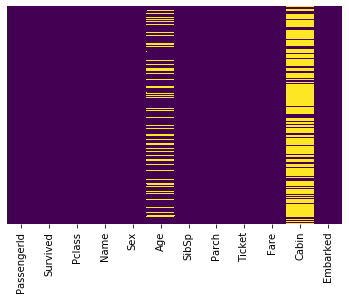

In [11]:
sns.heatmap(titanic_train.isnull(),yticklabels=False, cbar=False, cmap='viridis' )

In [12]:
sns.set_style('whitegrid')

In [13]:
#Ratio of who survived and who did not survive

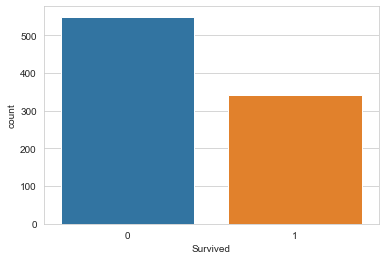

In [14]:
sns.countplot(x='Survived', data= titanic_train)

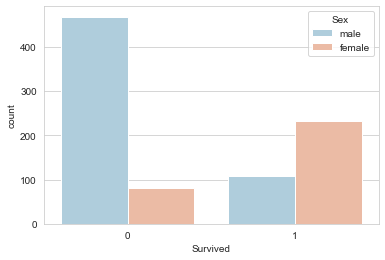

In [17]:
sns.countplot(x='Survived', data= titanic_train, hue='Sex', palette='RdBu_r')

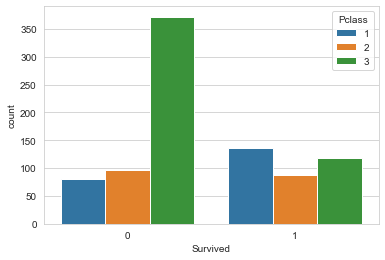

In [18]:
sns.countplot(x='Survived', data= titanic_train, hue='Pclass')

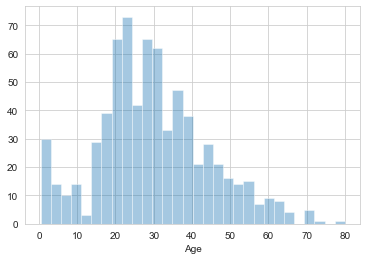

In [19]:
sns.distplot(titanic_train['Age'].dropna(), kde=False, bins=30)

In [20]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


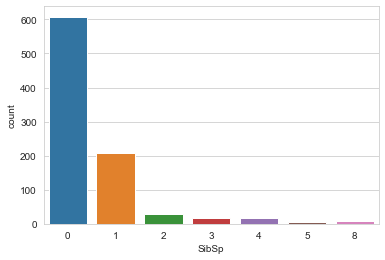

In [22]:
sns.countplot(x='SibSp', data=titanic_train)

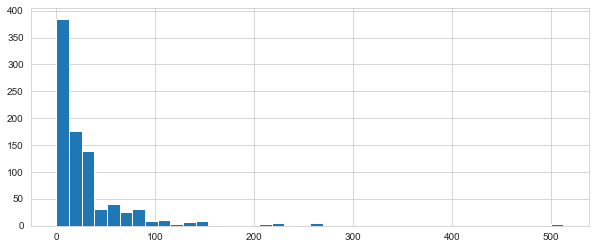

In [30]:
titanic_train['Fare'].hist(bins=40, figsize= (10,4))

In [31]:
import cufflinks as cf

In [32]:
cf.go_offline()

In [33]:
titanic_train['Fare'].iplot(kind='hist', bins=30)

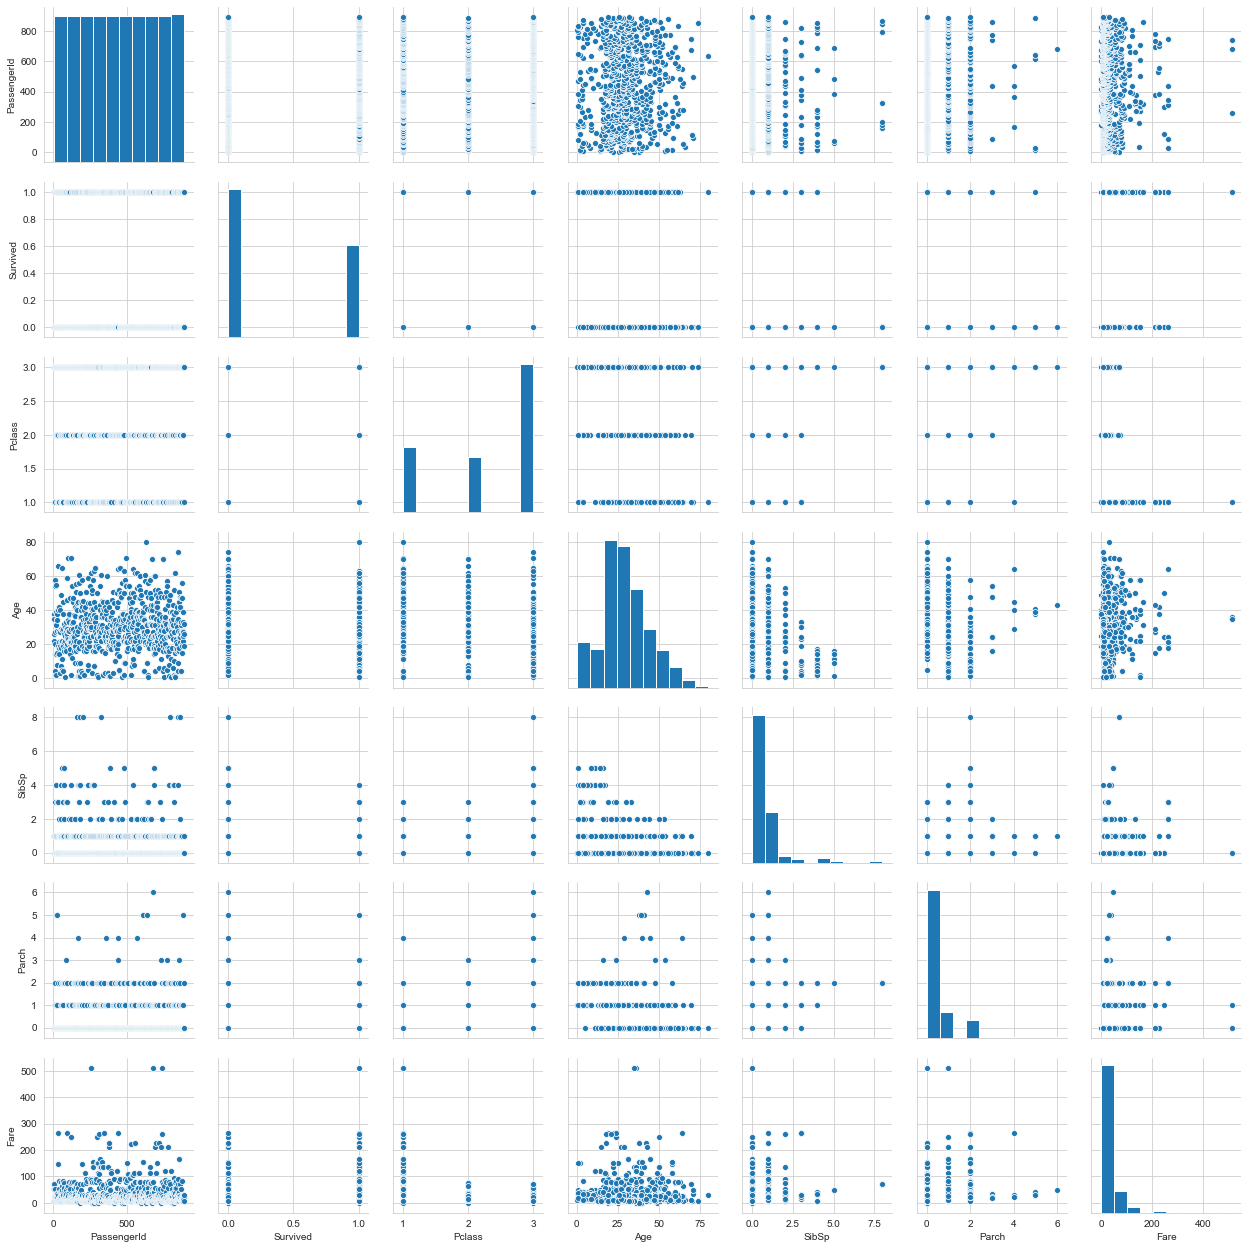

In [35]:
sns.pairplot(data=titanic_train)

In [37]:
#Data Cleaning

In [38]:
#checking out the average age according to the pclass

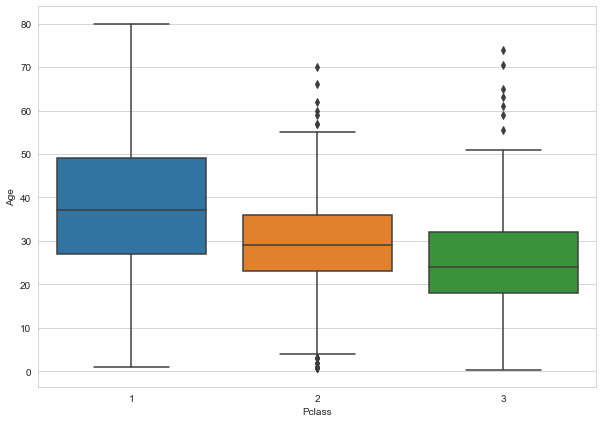

In [47]:
plt.figure(figsize = (10,7))
sns.boxplot(x='Pclass', y='Age', data=titanic_train)


In [48]:
#imputation the age column(filing in the missing data)

In [85]:
AvgP1 = titanic_train.groupby(['Pclass']).mean()
AvgP1 = np.ceil(AvgP1['Age'])


38.0

In [86]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return AvgP1.iloc[0]
        elif Pclass == 2:
            return AvgP1.iloc[1]
        else:
            return AvgP1.iloc[2]
    
    else:
        return Age

In [56]:
titanic_train['Age'] = titanic_train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [60]:
titanic_train.drop('Cabin', axis=1, inplace=True)

KeyError: "['Cabin'] not found in axis"

In [87]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [88]:
titanic_train.dropna(inplace=True)

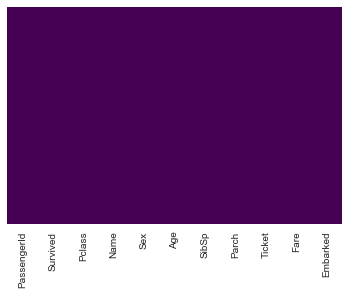

In [89]:
sns.heatmap(titanic_train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [93]:
sex = pd.get_dummies(titanic_train['Sex'], drop_first=True)

In [94]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [95]:
embark =pd.get_dummies(titanic_train['Embarked'], drop_first=True)

In [96]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [97]:
titanic_train = pd.concat([titanic_train, sex, embark], axis=1)

In [98]:
titanic_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [99]:
titanic_train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [101]:
titanic_train.drop('PassengerId', axis=1, inplace=True)

In [102]:
titanic_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


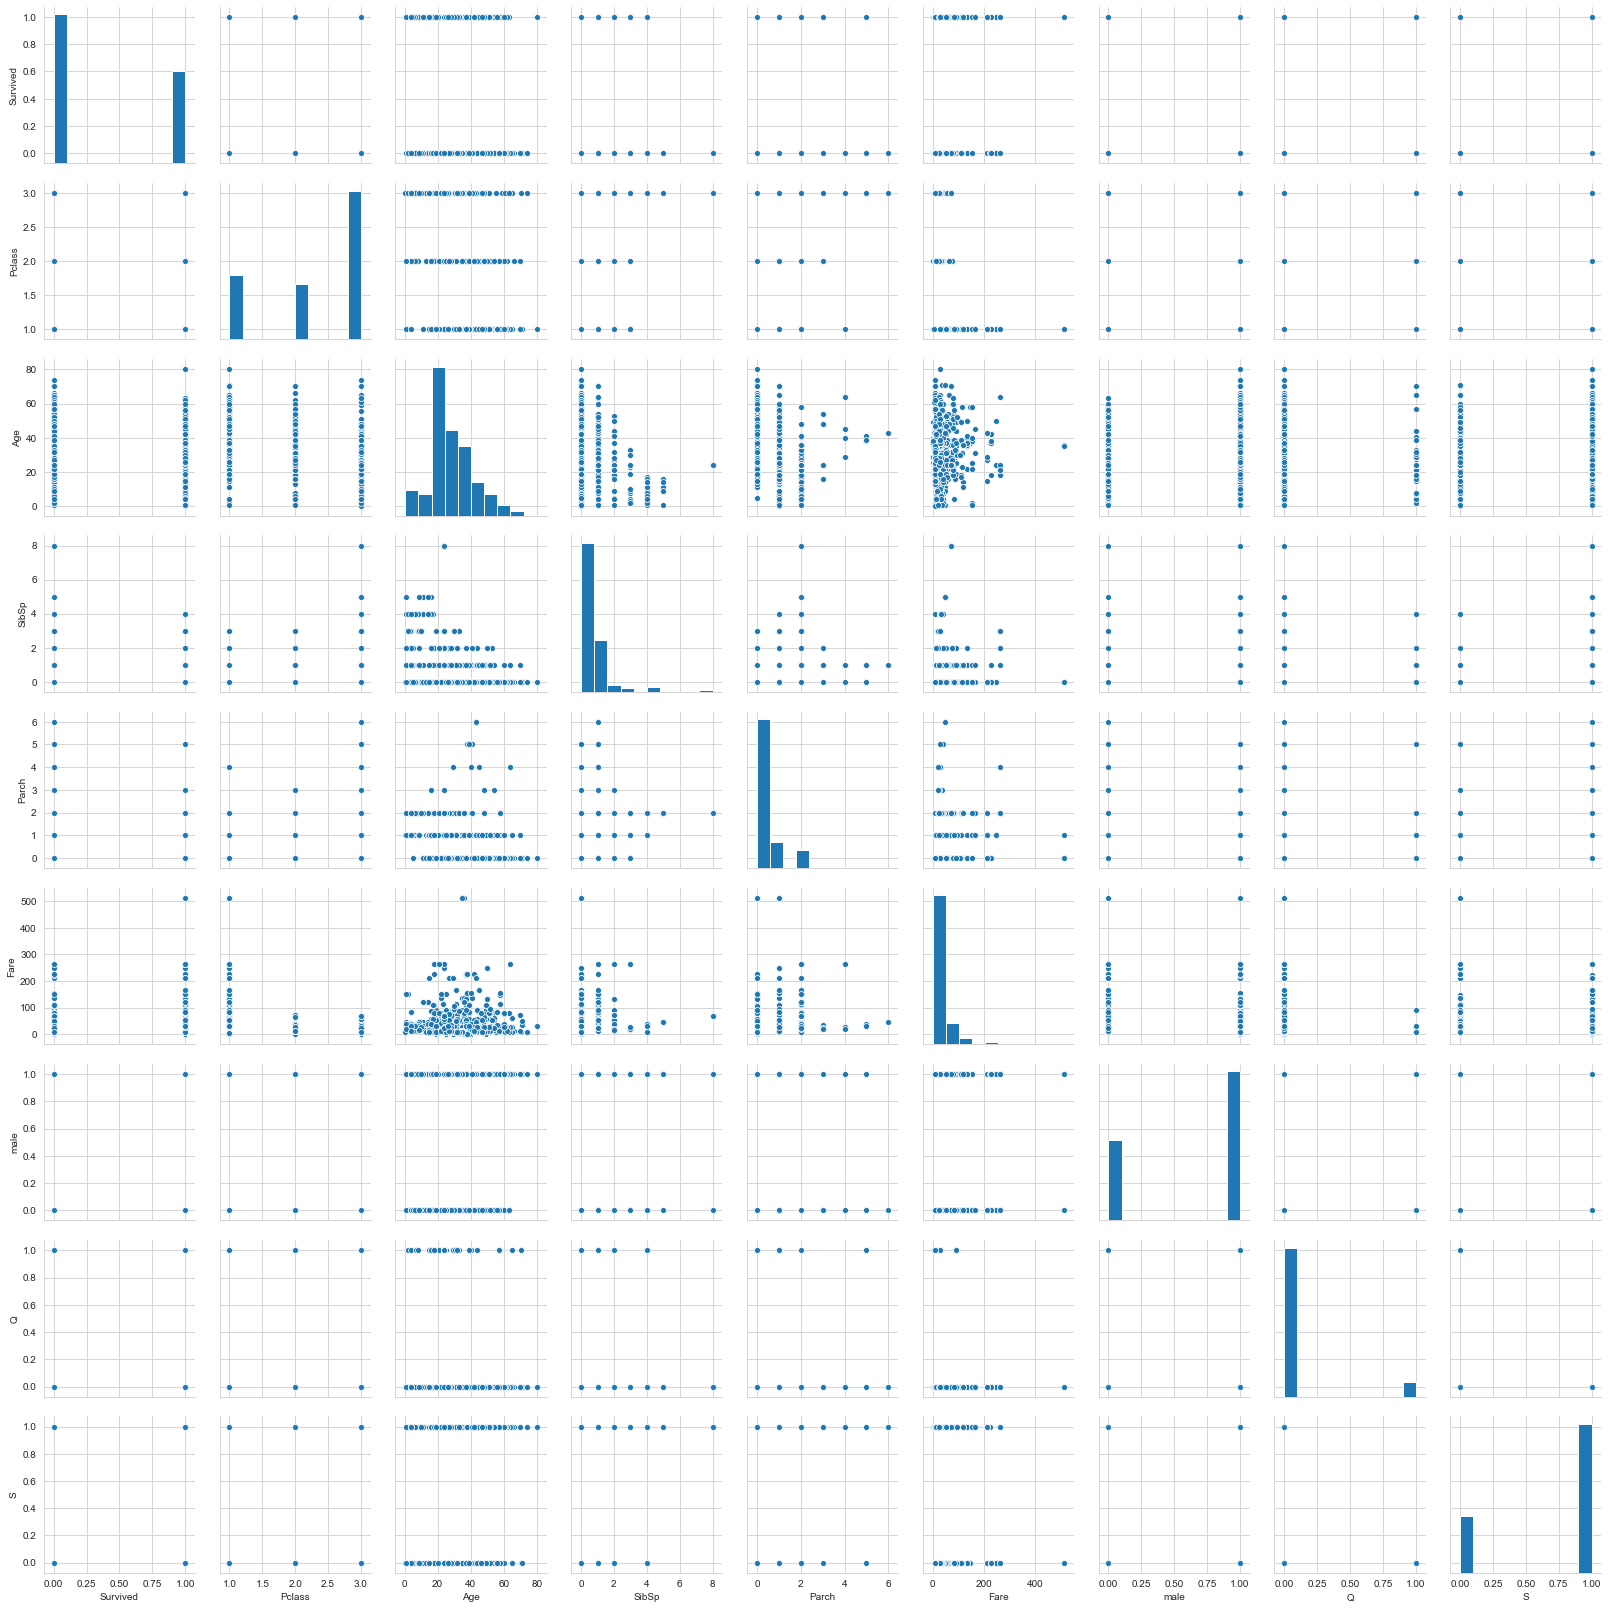

In [103]:
sns.pairplot(titanic_train)

In [124]:
#Run pd.getdummy on parch to compar results for fun
parch = pd.get_dummies(titanic_train['Parch'], drop_first=True)
parch.head()
titanic_train = pd.concat([titanic_train, parch], axis=1)
titanic_train.tail()
titanic_train.drop('Parch', inplace=True, axis=1)
titanic_train.head()

,Survived,Pclass,Age,SibSp,Fare,male,Q,S,1,2,...,3,4,5,6,1,2,3,4,5,6
0,0,3,22.0,1,7.2500,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,38.0,1,71.2833,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,26.0,0,7.9250,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,35.0,1,53.1000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,35.0,0,8.0500,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
titanic_train.columns

Index(['Survived',   'Pclass',      'Age',    'SibSp',     'Fare',     'male',
              'Q',        'S',          1,          2,          3,          4,
                5,          6,          1,          2,          3,          4,
                5,          6,          1,          2,          3,          4,
                5,          6],
      dtype='object')

In [127]:
y = titanic_train['Survived']
X = titanic_train[['Pclass',      'Age',    'SibSp',     'Fare',     'male',
              'Q',        'S',          1,          2,          3,          4,
                5,          6,          1,          2,          3,          4,
                5,          6,          1,          2,          3,          4,
                5,          6]]

In [128]:
X.head()

,Pclass,Age,SibSp,Fare,male,Q,S,1,1,1,...,3,4,4,4,5,5,5,6,6,6
0,3,22.0,1,7.2500,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,38.0,1,71.2833,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,26.0,0,7.9250,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,35.0,1,53.1000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,35.0,0,8.0500,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [130]:
X_train,  X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.4)

In [131]:
lr = LogisticRegression()

In [132]:
lr.fit(X_train, y_train)

C:\Users\saitejas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
lr.coef_

array([[-0.69918078, -0.02052878, -0.28214435,  0.00640292, -2.42194525,
         0.18739918, -0.0426249 ,  0.06335112,  0.06335112,  0.06335112,
        -0.01482265, -0.01482265, -0.01482265,  0.05399626,  0.05399626,
         0.05399626, -0.2696618 , -0.2696618 , -0.2696618 , -0.0873254 ,
        -0.0873254 , -0.0873254 ,  0.        ,  0.        ,  0.        ,
         0.06335112,  0.06335112,  0.06335112, -0.01482265, -0.01482265,
        -0.01482265,  0.05399626,  0.05399626,  0.05399626, -0.2696618 ,
        -0.2696618 , -0.2696618 , -0.0873254 , -0.0873254 , -0.0873254 ,
         0.        ,  0.        ,  0.        ,  0.06335112,  0.06335112,
         0.06335112, -0.01482265, -0.01482265, -0.01482265,  0.05399626,
         0.05399626,  0.05399626, -0.2696618 , -0.2696618 , -0.2696618 ,
        -0.0873254 , -0.0873254 , -0.0873254 ,  0.        ,  0.        ,
         0.        ]])

In [134]:
predictions = lr.predict(X_test)

In [135]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       216
           1       0.75      0.65      0.70       140

    accuracy                           0.78       356
   macro avg       0.77      0.76      0.76       356
weighted avg       0.78      0.78      0.77       356



In [136]:
print(confusion_matrix(y_test, predictions))

[[186  30]
 [ 49  91]]
